# Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

C:\Users\91820\AppData\Local\Temp\ipykernel_9040\3841706753.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


KeyboardInterrupt: 

# 1. Feature Extraction

### `DictVectorizer`
- Converts a list of dictionary objects into feature matrix.

In [3]:
data = [
    {'age':4, 'height': 96.0},
    {'age':3, 'height': 61.4},
    {'age':1, 'height': 82.0},
    {'age':2, 'height': 67.5}
]

In [6]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)
data_transformed = dv.fit_transform(data)
data_transformed

<4x2 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [8]:
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 3. , 61.4],
       [ 1. , 82. ],
       [ 2. , 67.5]])

# 2. Data Imputation

In [1]:
from sklearn.impute import SimpleImputer

In [4]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

### STEP 1: Checking presence of missing values

In [5]:
# CHECKING IF DATA CONTAINS ANY MISSING VALUES

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [7]:
# CHECKING IF THERE ARE MISSING VALUES FOR NUMERICAL COLUMNS

heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [9]:
# THERE ARE TWO NON NUMERICAL FEATURES: ca AND thal

print('Unique values in ca: ', heart_data['ca'].unique())
print('Unique values in thal: ', heart_data.thal.unique())

Unique values in ca:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal:  ['6.0' '3.0' '7.0' '?']


Both of them contain **missing values**. Let's find how many missing values are
there.
- `.loc` is a property of a pandas DataFrame used for label-based indexing
- `ca` is the column name.

In [10]:
heart_data.loc[heart_data.ca == '?', 'ca']

166    ?
192    ?
287    ?
302    ?
Name: ca, dtype: object

In [13]:
print('# of missing values in ca: ', heart_data.loc[heart_data.ca=='?', 'ca'].count())
print('# of missing values in thal: ', heart_data.loc[heart_data.thal=='?', 'thal'].count())

# of missing values in ca:  4
# of missing values in thal:  2


### STEP 2: Replacing `?` with `nan`

In [14]:
heart_data.replace('?', np.nan, inplace=True)

### STEP 3: Filling missing values
- We will try two variations
    1. `add_indicator = False` is the default choice, imputes only the missing
       values.
    2. `add_indicator = True` adds additional column for each column containing
       missing values.

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
heart_data_imputed.shape

(303, 14)

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
heart_data_imputed_with_indicator.shape

(303, 16)

# 3. Feature Scaling

In [23]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)

### STEP 1: Examine the data

In [24]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### STEP 1a *optional*: Convert non-numerical attributes to numerical ones

In [26]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [33]:
abalone_data.replace({'M': 1, 'F': 2, 'I': 3}, inplace=True)
abalone_data.Sex.unique()

C:\Users\91820\AppData\Local\Temp\ipykernel_16852\2001103428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  abalone_data.replace({'M': 1, 'F': 2, 'I': 3}, inplace=True)


array([1, 2, 3], dtype=int64)

### STEP 2: Separate features and labels

In [35]:
y = abalone_data.pop('Rings')

### STEP 3: Examine feature scales

In [37]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


##### Histogram

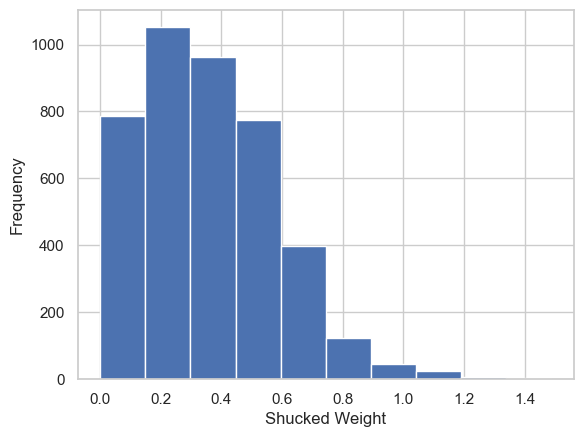

In [38]:
abalone_data['Shucked weight'].plot.hist(bins=10)
plt.xlabel('Shucked Weight')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Shucked weight', ylabel='Count'>

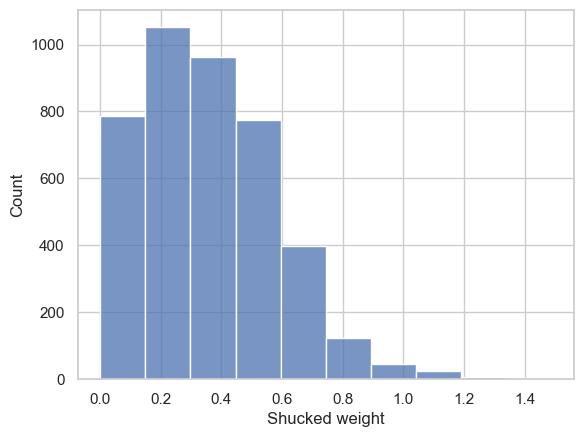

In [40]:
sns.histplot(data=abalone_data, x='Shucked weight', bins=10)

##### KDE Plot
- Kernel Density Estimate.
- Helps estimating PDF.
- Notice different features have different distributions and **scales**

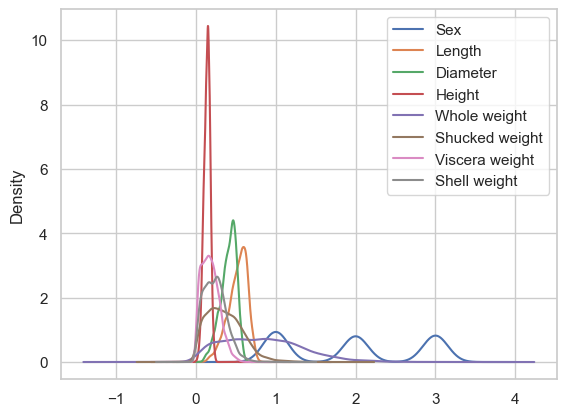

In [41]:
ax = abalone_data.plot.kde()

##### Box Plot

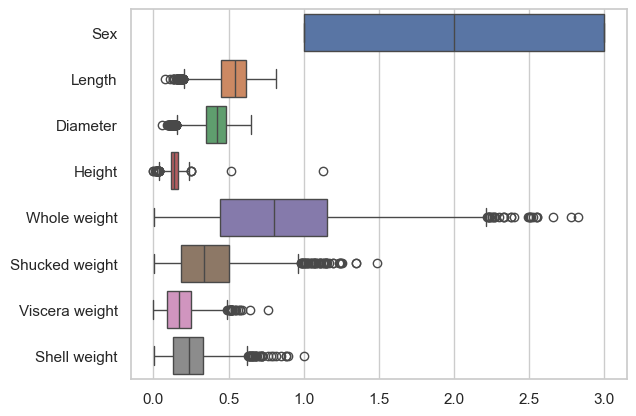

In [42]:
sns.boxplot(data=abalone_data, orient='h')
plt.show()

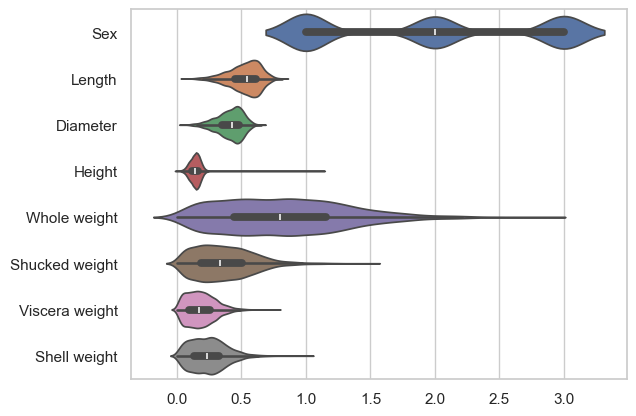

In [43]:
sns.violinplot(data=abalone_data, orient='h')
plt.show()

### Conclusion from Plotting
- Looking at above graphs we can conclude that **features are on different scales**.

### STEP 4. Scaling

### Normalization

##### `MaxAbsScaler`

In [45]:
x = np.array([4, 2, 5, -2, -100])
x

array([   4,    2,    5,   -2, -100])

In [49]:
x = x.reshape(-1, 1)
# Using -1 as a parameter tells NumPy to infer the number of rows or columns
# based on the size of the original array
# second parameter specifies the number of columns
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [50]:
from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
x_new

array([[ 0.04],
       [ 0.02],
       [ 0.05],
       [-0.02],
       [-1.  ]])

##### `MinMaxScalar`

In [51]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mm = MinMaxScaler()
X_normalized = mm.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

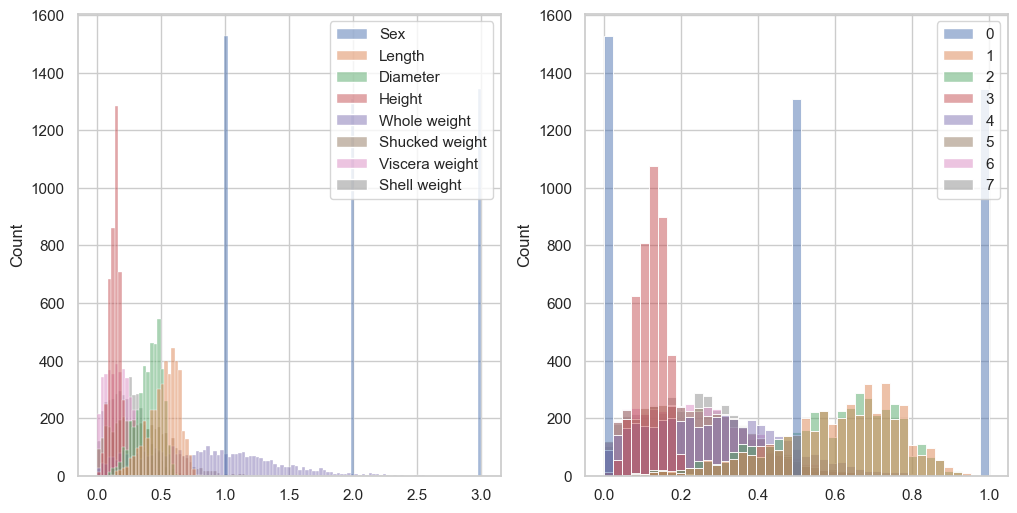

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=X, ax=axes[0])
sns.histplot(data=X_normalized, ax=axes[1])
plt.show()

### Standardization

In [59]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)

In [60]:
# PRINTING MEANS OF EACH OF THE FEATURE

X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [61]:
# PRINTING STANDARD DEVIATION OF EACH OF THE FEATURE

X_standardized.std(axis =0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
# CONVERTING ARRAY TO DATA FRAME
data = pd.DataFrame(X_standardized, columns=abalone_data.columns)

<Axes: ylabel='Density'>

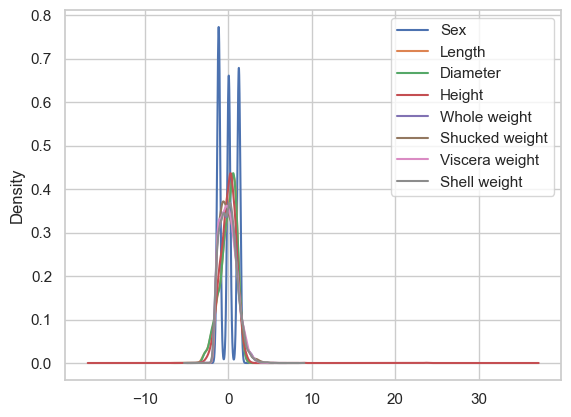

In [66]:
data.plot.kde()

<Axes: >

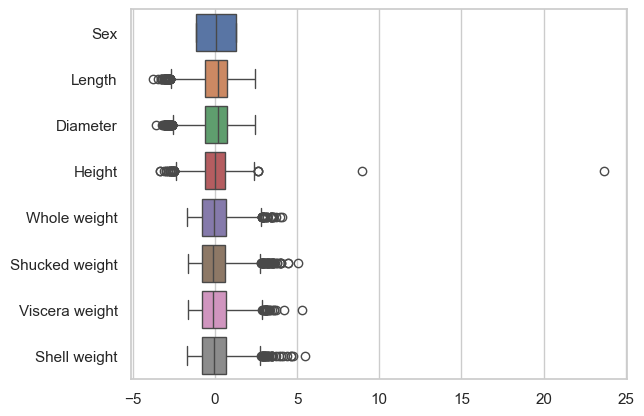

In [68]:
sns.boxplot(data=data, orient='h')

<Axes: >

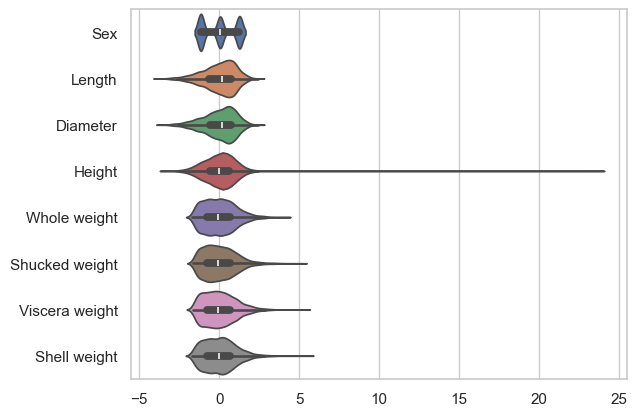

In [69]:
sns.violinplot(data=data, orient='h')

# 4. `add_dummy_feature`
- Useful for adding a parameter for bias term in the model.

In [2]:
x = np.array(
    [
        [7, 1],
        [1, 8],
        [2, 0],
        [9, 6]
    ]
)

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
x_new

array([[1., 7., 1.],
       [1., 1., 8.],
       [1., 2., 0.],
       [1., 9., 6.]])

# 5. Custom Transformers

In [3]:
from sklearn.preprocessing import FunctionTransformer

In [4]:
wine_data = pd.read_csv('./data/winequality-red.csv', sep=';')

In [5]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
